In [ ]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
from statsmodels.stats import weightstats as stests
from scipy.stats import norm
import matplotlib.pyplot as plt
import statsmodels.api as sm
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import platform
print(platform.python_version())
scipy.version

3.7.13


<module 'scipy.version' from '/usr/local/lib/python3.7/dist-packages/scipy/version.py'>

In [ ]:
data = pd.read_csv('drive/My Drive/data/Lab2Data.csv', sep=',', na_values=".")
data  

,Specimen,VIQ
0,1,3193
1,2,3124
2,3,3153
3,4,3145
4,5,3093
5,6,3466
6,7,3355
7,8,2979
8,9,3182
9,10,3227


Part A)
Hypothesis Test for Mean with Variance Unknown


In [ ]:
## H0=3200
## H1=/3200
##   ^ this is supposed to be "not equal"

In [ ]:
VIQmean=np.mean(data['VIQ'])
VIQmean

3210.733333333333

In [ ]:
VIQstd=np.std(data['VIQ'])
VIQstd

113.62362821565279

In [ ]:
scipy.stats.ttest_1samp(data['VIQ'],3200)

Ttest_1sampResult(statistic=0.353451624297281, pvalue=0.7290157143441449)

In [ ]:
scipy.stats.t.interval(.05,14,VIQmean,VIQstd)

(3203.479572174935, 3217.987094491731)

In order to make this two sided test a one sided test, we divide the P value in half



With a P value of .729 we cannot reject the null hypothesis.
(1-.729015)(100%)= 27%


Part B)
Tests of Hypothesis on the Means of Two Normal Distributions, Variances Unknown

In [ ]:
## H0= mu1=mu2
## H1= mu1=/mu2
##        ^ this is supposed to be "not equal"

In [ ]:
data2 = pd.read_csv('drive/My Drive/data/Lab2Data2.csv', sep=',', na_values=".")
data2  

,Observation Number,Catalyst 1,Catalyst 2
0,1,91.50,89.19
1,2,94.18,90.95
2,3,92.18,90.46
3,4,95.39,93.21
4,5,91.79,97.19
5,6,89.07,97.04
6,7,94.72,91.07
7,8,89.21,92.75


In [ ]:
scipy.stats.ttest_ind(data2['Catalyst 1'], data2['Catalyst 2'], equal_var=True)

Ttest_indResult(statistic=-0.3535908643461798, pvalue=0.7289136186068217)

Since the pvalue is yet again very large we would fail to reject the null hypothesis. This is a two sided test.

Part C) Tests on Variances of Normal Distributions
(F-Test)

In [ ]:
## H0= Sigma1^2 = Sigma2^2
## H1= Sigma1^2 =/ Sigma2^2
##              ^ this is supposed to be "not equal"
## Alpha=0.05

In [ ]:
x= [74,76,74,69,58,71,66,65]
y= [78,79,75,66,63,70,66,67]

In [ ]:
def f_test(x,y):
  x = np.array(x)
  y = np.array(y)
  f = np.var(x, ddof=1)/np.var(y,ddof=1)
  dfn = x.size-1
  dfd = y.size-1
  p = 1-scipy.stats.f.cdf(f,dfn,dfd)
  return f, p

f_test(x,y)

(0.9646317829457366, 0.5183322097160306)

Since the p value is 0.52 we cannot reject the null hypothesis

**Homework 4**





**Problem 1**:
Consider the “Bushing Diameter 2 Batches.XLS” file. Two quality characteristics X and Y.....

In [ ]:
data3 = pd.read_csv('drive/My Drive/data/Hw4Data.csv', sep=',', na_values=".")
data3.head()  

,Batch 1,Batch 2
0,1.001,1.000
1,1.005,1.005
2,1.015,1.015
3,1.020,1.005
4,1.010,0.990


In [ ]:
data3.describe()

,Batch 1,Batch 2
count,50.000000,50.000000
mean,1.003360,1.003660
std,0.007714,0.007227
min,0.985000,0.990000
25%,0.999000,1.000000
50%,1.001000,1.005000
75%,1.009000,1.006750
max,1.025000,1.019000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8bc2f76110>,
      dtype=object)

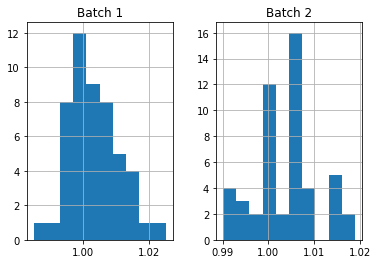

In [ ]:
data3.hist()

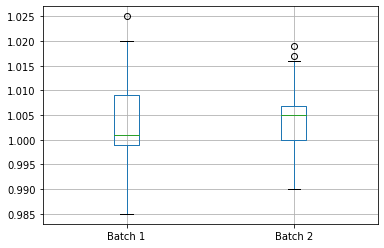

In [ ]:
data3.boxplot()

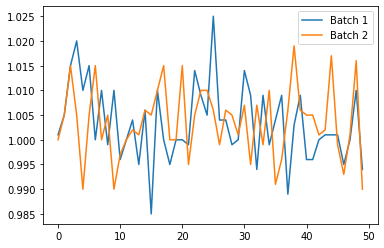

In [ ]:
data3.plot.line()

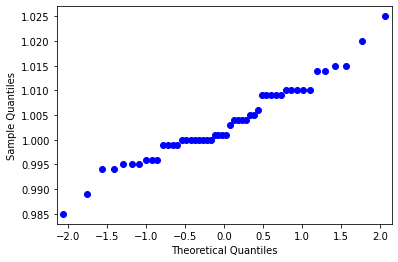

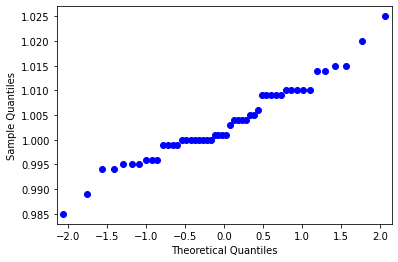

In [ ]:
sm.qqplot(data3['Batch 1'])

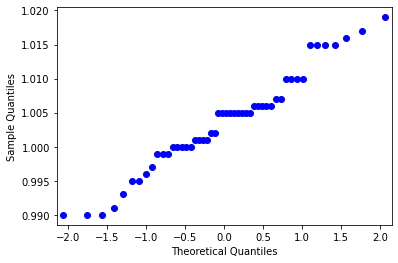

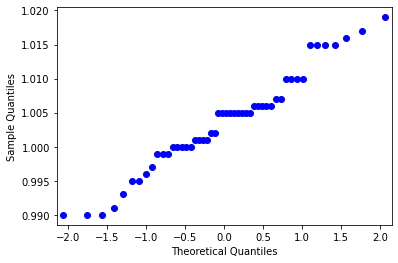

In [ ]:
sm.qqplot(data3['Batch 2'])

Based on this data the batches are quite similar with some small differences. The first batch has a little wider range of numbers than, the second batch has tighter quality, this is shown in the box plot chart. According to the histogram, the first batch has a much more regular normal distribution, but is skewed right, than the second which has a more scattered grouping. 

Based on the descriptive statistics they have, on average, the same output of 1.00366. The first batch has a higher max and a lower min than the second batch.

**Problem 2**: Can you conclude that both batches are from different populations? Use proper statistical inference.....

In [ ]:
## H0 mu batch 1 = mu batch 2
## H1 mu batch 1 =/ mu batch 2
 

In [ ]:
scipy.stats.ttest_ind(data3['Batch 1'],data3['Batch 2'], equal_var=True)

Ttest_indResult(statistic=-0.20069320812014202, pvalue=0.8413543932394967)

Due to the pvalue being .84 we cannot reject the null hypothesis, so the values cannot conclude that they are from different populations. This is also shown in the charts above, the mean was the same with the data given and they both have a normal distribution. The box plot shows how similar they are too.

**Problem 3** (4.6): Suppose that you are testing the following hypotheses
where the variance is unknown..... (pg176) also appendix 

In [ ]:
## H0 mu=100
## H1 mu<100
## df=25-1=24
## Using the appendix chart page 714

1.   a) t0= -2.80 alpha [0.005, 0.0025]
2.   b) t0= -1.75 alpha [0.05, 0.025]
3.   c) t0= -2.54 alpha [0.01, 0.005]
4.   d) t0= -2.05 alpha [0.05, 0.025]

**Problem 4** (4.11): A new process has been developed for applying
photoresist to 125-mm silicon wafers used in
manufacturing integrated circuits..... (pg176)

In [ ]:
data4 = pd.read_csv('drive/My Drive/data/Hw4Data4.csv', sep=',', na_values=".")
data4.head()

,Wafer,Thickness
0,1,13.3987
1,2,13.3957
2,3,13.3902
3,4,13.4015
4,5,13.4001


In [ ]:
## H0: mu0=13.4
## H1: mu0=/13.4
##        ^ this is supposed to be "not equal"
## Alpha=0.05

In [ ]:
m=np.mean(data4['Thickness'])
m

13.396180000000001

In [ ]:
std=np.std(data4['Thickness'])
std

0.0037080453071665796

In [ ]:
scipy.stats.ttest_1samp(data4['Thickness'],13.4)

Ttest_1sampResult(statistic=-3.0905771237069133, pvalue=0.012917430540578496)

4.11 part A) The null hypothesis can be rejected since the p value is beneath 0.05

In [ ]:
scipy.stats.t.interval(.05,9,m,std)

(13.395940917141044, 13.396419082858959)

4.11 part B) the lower bounds is 13.3959 and the upper bounds is 13.3964

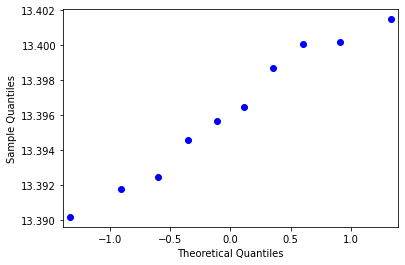

In [ ]:
fig= sm.qqplot(data4['Thickness'])
plt.show()

4.11 part C) according to the quantile plot we can use the "fat pencil test" to determine that this is a normal distribution of data.